In [202]:
import pandas as pd
import numpy as np

In [203]:
pd.set_option('display.max_columns', None)

In [204]:
# 가격 데이터 세팅
test_df = pd.read_csv("./csv/test_df.csv")
test_df = test_df.set_index('date')

In [205]:
event_df = pd.read_csv("./csv/bitcoin_event.csv")
event_df = event_df.set_index('Date')

In [206]:
exchange_whales_ratio_df = pd.read_csv("./csv/exchange_whale_ratio_btc.csv")
exchange_whales_ratio_df = exchange_whales_ratio_df.set_index('date')
exchange_whales_ratio_df = exchange_whales_ratio_df[(exchange_whales_ratio_df.index>='2018-01-01')&(exchange_whales_ratio_df.index<='2024-12-31')]
exchange_whales_ratio_df

,top10_btc,total_btc,exchange_whales_ratio
date,,,
2018-01-01,18563.266606,66579.992867,0.278811
2018-01-02,27552.455313,118752.360111,0.232016
2018-01-03,23087.152452,116137.372705,0.198792
2018-01-04,30395.482938,148187.852942,0.205115
2018-01-05,42404.931184,154231.376375,0.274944
...,...,...,...
2024-12-27,19616.500362,47796.378106,0.410418
2024-12-28,6792.989991,18912.163563,0.359186
2024-12-29,6906.978151,19603.648624,0.352331


In [207]:
# Not Working Period 근거 찾을 df
df = pd.read_csv("./csv/preprocessed_index.csv")
df = df.set_index('date')
df['close'] = test_df['close']
df['open'] = test_df['open']
df['high'] = test_df['high']
df['low'] = test_df['low']
df['high_low'] = test_df['high_low']
df['volume'] = test_df['volume']

df['exchange_whales_ratio'] = exchange_whales_ratio_df['exchange_whales_ratio']
df['top10_btc'] = exchange_whales_ratio_df['top10_btc']
df['total_btc'] = exchange_whales_ratio_df['total_btc']

df['event_flag'] = event_df['Event']

df = df.dropna()

# 컬럼명 변환
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [208]:
df

,10yr+_hodl_wave,1yr+_hodl_wave,5yr+_hodl_wave,addresses_with_>_0_btc,addresses_with_>_0.01_btc,addresses_with_>_0.1_btc,addresses_with_>_1_btc,addresses_with_>_10_btc,addresses_with_>_100_btc,"addresses_with_>_1,000_btc","addresses_with_>_10,000_btc",balanced_price,active_addresses_7dma,hash_rate_7dma,miner_difficulty,circulating_supply,cdd_(90dma),cvdd,delta_top,long-term_holder_realized_price,miner_revenue_-_block_rewards,miner_revenue_-_fees,miner_fees_%,miner_revenue_-_total,new_addresses,addresses_in_loss,addresses_in_profit,realized_price,mvocd,short-term_holder_realized_price,supply_adjusted_cdd_(90dma),terminal_price,top_cap,vdd_multiple,whale_shadows,close,open,high,low,high_low,volume,exchange_whales_ratio,top10_btc,total_btc,event_flag
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.000000,0.429454,0.169910,26932444,6738893,2466213,695973,150011,17428,1643,115,4291.480599,1.008569e+06,1.439621e+07,1.922581e+12,1.677644e+07,2.261100e+07,1974.270919,30504.369180,612.692505,1950.000000,469.413036,0.194019,2419.413036,379241,0.176911,0.823089,4997.567470,16652.143831,10019.383034,1.354708,14827.824303,22393.015558,3.342294,2138.361311,13380.00,13716.36,13818.55,12750.00,1068.55,8609.915844,0.278811,18563.266606,66579.992867,0.0
2018-01-02,0.000000,0.428727,0.169883,27006790,6773228,2474753,698873,149858,17397,1642,115,4331.081845,1.041435e+06,1.485243e+07,1.931136e+12,1.677858e+07,2.277757e+07,1992.605610,30794.730541,630.611548,2137.500000,649.164976,0.232954,2786.664976,568404,0.123727,0.876273,5043.635229,17384.094611,10164.392910,1.364577,14963.621073,22553.580313,3.367404,6646.130949,14675.11,13382.16,15473.49,12890.02,2583.47,20078.092111,0.232016,27552.455313,118752.360111,0.0
2018-01-03,0.000000,0.428496,0.169797,27231367,6893306,2505683,700921,149749,17389,1636,114,4355.374135,1.055904e+06,1.493043e+07,1.931136e+12,1.678054e+07,2.239869e+07,2001.906414,30954.745176,637.446651,1962.500000,749.685473,0.276414,2712.185473,654027,0.115098,0.884902,5071.169754,17384.094611,10239.014955,1.341677,15031.707989,22717.215492,3.350200,891.013153,14919.51,14675.11,15307.56,14150.00,1157.56,15905.667639,0.198792,23087.152452,116137.372705,0.0
2018-01-04,0.000000,0.428044,0.169836,27512311,7060519,2560170,707011,149845,17344,1631,113,4396.675593,1.092097e+06,1.525240e+07,1.931136e+12,1.678264e+07,2.243874e+07,2013.219886,31238.738219,657.780469,2100.000000,778.261095,0.270393,2878.261095,710847,0.106370,0.893630,5116.426349,17384.094611,10410.870701,1.343988,15114.765893,22881.231136,3.341638,900.965388,15059.54,14919.51,15280.00,13918.04,1361.96,21329.649574,0.205115,30395.482938,148187.852942,0.0
2018-01-05,0.000000,0.427687,0.169715,27741584,7188360,2594842,711873,149781,17351,1623,113,4483.091615,1.088393e+06,1.501869e+07,1.931136e+12,1.678443e+07,2.260687e+07,2036.509582,31864.072154,663.925956,1787.499999,701.356021,0.281799,2488.856020,596335,0.045599,0.954401,5211.091186,17384.094611,10624.057611,1.353932,15287.990992,23067.830747,3.340661,2661.432978,16960.39,15059.54,17176.24,14600.00,2576.24,23251.491125,0.274944,42404.931184,154231.376375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,0.168700,0.657364,0.310983,54313850,12680959,4580740,1013552,152671,16050,2081,102,24225.667582,7.326846e+05,6.407517e+08,8.840440e+13,1.975937e+07,1.069032e+07,25223.088951,142622.066005,24908.803530,406.250000,8.530836,0.020567,414.780836,311475,0.069042,0.930958,31884.744000,22249.997332,62532.881992,0.541627,160840.604782,402855.709966,0.613098,146.820920,65173.99,63152.01,65839.00,62670.00,3169.00,28373.305930,0.445436,22065.646497,49537.165179,0.0
2024-09-27,0.168708,0.657467,0.311115,54345381,12682492,4580649,1013559,152640,16049,2081,102,24254.574787,7.236687e+05,6.313353e+08,8.840440e+13,1.975980e+07,1.075623e+07,25235.339742,142781.740702,24918.226512,428.12

##### 데이터 명세서

n yr+ hodl wave = 온체인에서 N년동안 움직이지 않은 비트코인이 전체 비트코인 중 차지하는 비율
<br>-> 분석 상 주의해야 할 부분 (단순히 Holding이 아니라 잃어버린 비트코인일 가능성)

addresses with > n btc = N개의 비트코인 초과를 가지고 있는 Address의 수

balanced_price = Transferred Price - Realized Price.
<br>Transfered Price = Sum of CDD / Existing Supply of Bitcoin in circulation
<br>Realized Price = the cost-basis value of all bitcoin in circulation


active_addresses_7dma = 당일 온체인에서 Receive, Send한 Address의 수 (7일 이동평균)

hash_rate_7dma = 비트코인 Hash Rate (7일 이동평균)

miner_difficulty = 비트코인 채굴 난이도

circulating_supply = 실제로 시장에 유통중인 비트코인의 수 (장기보유, 분실 제외한 비트코인 수)

cdd_(90dma) = Coin Destroyed Days, 코인이 얼마나 오랫동안 보관되었다가 이동했는지를 알려줌 (보관량 X 보관일수)

cvdd = Cumulative value of CDD (Cumulative CDD 가중 비트코인 가격)

Delta Cap = Realized Cap - Average Cap (대충 비트코인 가격 상한선 지표)

long-term_holder_realized_price = 장기보유자 realized price

short-term_holder_realized_price = 단기보유자 realized price

miner_revenue_-_block_rewards = 채굴자 순보상

miner_revenue_-_fees = 채굴자 보상 수수료

miner_fees_% = 채굴자 보상 수수료 비율

miner_revenue_-_total = 채굴자 순보상 + 채굴자 보상 수수료

new_addresses = 신규 지갑주소 수

addresses_in_loss = 손해인 지갑 비율

addresses_in_profit = 수익인 지갑 비율

realized_price = the cost-basis value of all bitcoin in circulation

mvocd = 소멸된 코인의 중앙값(일)

supply_adjusted_cdd_(90dma) = 공급량 조정 CDD

terminal_price = Transferred price / supply of bitcoin in circulation * 21 (21 곱하는 이유는 비트코인양 상한이 2100만개)

top_cap = average cap * 20 (대충 비트코인 가격 상한선 지표)

vdd_multiple = VDD / 30 day average VDD | VDD = CDD * Coin Price

whale_shadows = 한 지갑에 오래 보관된 비트코인 중에 옮겨간 양

close = 종가

open = 시가

high = 고가

low = 저가

high_low = 고가 - 저가

volume = 거래량

### 목표
<br>안 먹히는 기간
<br>2018.01.01 - 2018.12.31
<br>2020.01.01 - 2020.12.31
<br>2022.01.01 - 2022.12.31
<br>2024.01.01 - 2024.12.31

<br>되는 기간
<br>2017.01.01 - 2017.12.31
<br>2019.01.01 - 2019.12.31
<br>2021.01.01 - 2021.12.31
<br>2023.01.01 - 2023.12.31


<br>왜 안 먹히는지 이유 찾기
<br>예시: New address / activation addresses 보니까 새로운 뉴비 유입이 많았어서 그렇다 ...~~

In [209]:
df

,10yr+_hodl_wave,1yr+_hodl_wave,5yr+_hodl_wave,addresses_with_>_0_btc,addresses_with_>_0.01_btc,addresses_with_>_0.1_btc,addresses_with_>_1_btc,addresses_with_>_10_btc,addresses_with_>_100_btc,"addresses_with_>_1,000_btc","addresses_with_>_10,000_btc",balanced_price,active_addresses_7dma,hash_rate_7dma,miner_difficulty,circulating_supply,cdd_(90dma),cvdd,delta_top,long-term_holder_realized_price,miner_revenue_-_block_rewards,miner_revenue_-_fees,miner_fees_%,miner_revenue_-_total,new_addresses,addresses_in_loss,addresses_in_profit,realized_price,mvocd,short-term_holder_realized_price,supply_adjusted_cdd_(90dma),terminal_price,top_cap,vdd_multiple,whale_shadows,close,open,high,low,high_low,volume,exchange_whales_ratio,top10_btc,total_btc,event_flag
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.000000,0.429454,0.169910,26932444,6738893,2466213,695973,150011,17428,1643,115,4291.480599,1.008569e+06,1.439621e+07,1.922581e+12,1.677644e+07,2.261100e+07,1974.270919,30504.369180,612.692505,1950.000000,469.413036,0.194019,2419.413036,379241,0.176911,0.823089,4997.567470,16652.143831,10019.383034,1.354708,14827.824303,22393.015558,3.342294,2138.361311,13380.00,13716.36,13818.55,12750.00,1068.55,8609.915844,0.278811,18563.266606,66579.992867,0.0
2018-01-02,0.000000,0.428727,0.169883,27006790,6773228,2474753,698873,149858,17397,1642,115,4331.081845,1.041435e+06,1.485243e+07,1.931136e+12,1.677858e+07,2.277757e+07,1992.605610,30794.730541,630.611548,2137.500000,649.164976,0.232954,2786.664976,568404,0.123727,0.876273,5043.635229,17384.094611,10164.392910,1.364577,14963.621073,22553.580313,3.367404,6646.130949,14675.11,13382.16,15473.49,12890.02,2583.47,20078.092111,0.232016,27552.455313,118752.360111,0.0
2018-01-03,0.000000,0.428496,0.169797,27231367,6893306,2505683,700921,149749,17389,1636,114,4355.374135,1.055904e+06,1.493043e+07,1.931136e+12,1.678054e+07,2.239869e+07,2001.906414,30954.745176,637.446651,1962.500000,749.685473,0.276414,2712.185473,654027,0.115098,0.884902,5071.169754,17384.094611,10239.014955,1.341677,15031.707989,22717.215492,3.350200,891.013153,14919.51,14675.11,15307.56,14150.00,1157.56,15905.667639,0.198792,23087.152452,116137.372705,0.0
2018-01-04,0.000000,0.428044,0.169836,27512311,7060519,2560170,707011,149845,17344,1631,113,4396.675593,1.092097e+06,1.525240e+07,1.931136e+12,1.678264e+07,2.243874e+07,2013.219886,31238.738219,657.780469,2100.000000,778.261095,0.270393,2878.261095,710847,0.106370,0.893630,5116.426349,17384.094611,10410.870701,1.343988,15114.765893,22881.231136,3.341638,900.965388,15059.54,14919.51,15280.00,13918.04,1361.96,21329.649574,0.205115,30395.482938,148187.852942,0.0
2018-01-05,0.000000,0.427687,0.169715,27741584,7188360,2594842,711873,149781,17351,1623,113,4483.091615,1.088393e+06,1.501869e+07,1.931136e+12,1.678443e+07,2.260687e+07,2036.509582,31864.072154,663.925956,1787.499999,701.356021,0.281799,2488.856020,596335,0.045599,0.954401,5211.091186,17384.094611,10624.057611,1.353932,15287.990992,23067.830747,3.340661,2661.432978,16960.39,15059.54,17176.24,14600.00,2576.24,23251.491125,0.274944,42404.931184,154231.376375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,0.168700,0.657364,0.310983,54313850,12680959,4580740,1013552,152671,16050,2081,102,24225.667582,7.326846e+05,6.407517e+08,8.840440e+13,1.975937e+07,1.069032e+07,25223.088951,142622.066005,24908.803530,406.250000,8.530836,0.020567,414.780836,311475,0.069042,0.930958,31884.744000,22249.997332,62532.881992,0.541627,160840.604782,402855.709966,0.613098,146.820920,65173.99,63152.01,65839.00,62670.00,3169.00,28373.305930,0.445436,22065.646497,49537.165179,0.0
2024-09-27,0.168708,0.657467,0.311115,54345381,12682492,4580649,1013559,152640,16049,2081,102,24254.574787,7.236687e+05,6.313353e+08,8.840440e+13,1.975980e+07,1.075623e+07,25235.339742,142781.740702,24918.226512,428.12

### 연도별 이벤트

In [218]:
df['year'] = pd.to_datetime(df.index).to_frame()['date'].dt.year  # 'date' 열이 datetime 형식이어야 합니다.
df[df['event_flag']==1].groupby('year')['event_flag'].count()

year
2018    54
2019    21
2020    14
2021    16
2022    13
2023     1
2024     3
Name: event_flag, dtype: int64

### 입금액 / Volume 시각화

In [211]:
total_per_volume_df = (np.log(df['total_btc'] / df['volume']))
top10_per_volume_df = (np.log(df['top10_btc'] / df['volume']))

<Axes: xlabel='date'>

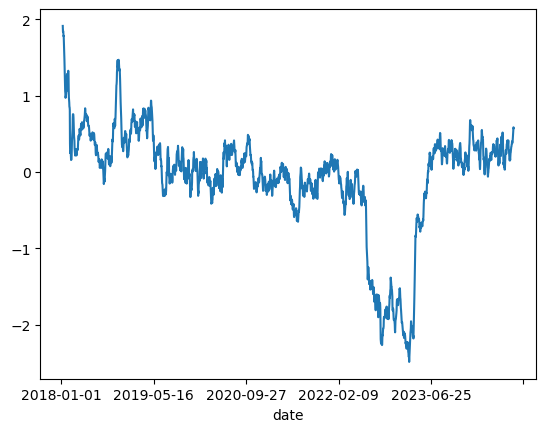

In [212]:
total_per_volume_df.rolling(10).mean().plot()

<Axes: xlabel='date'>

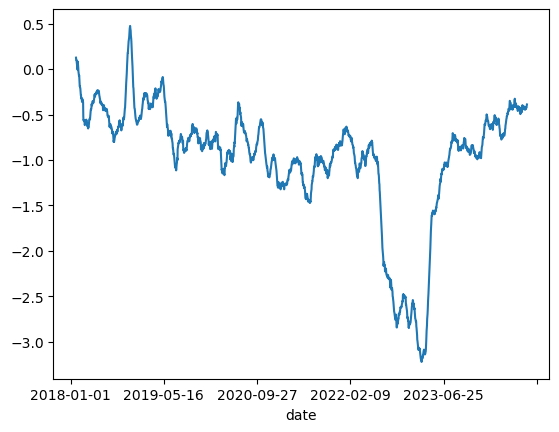

In [213]:
top10_per_volume_df.rolling(30).mean().plot()

<Axes: xlabel='date'>

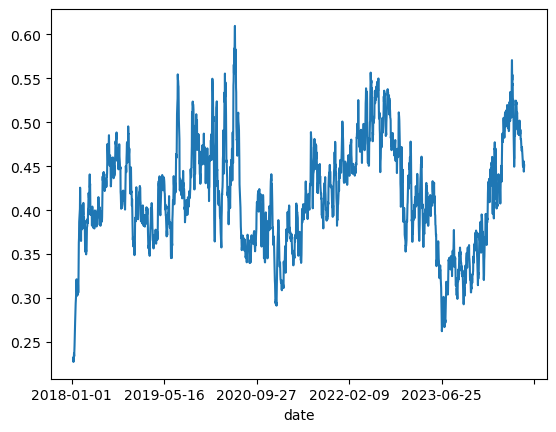

In [214]:
df['exchange_whales_ratio'].rolling(10).mean().plot()

In [215]:
yearly_avg = df.groupby('year')['exchange_whales_ratio'].mean()
print(yearly_avg)

year
2018    0.403999
2019    0.421704
2020    0.417794
2021    0.397225
2022    0.474305
2023    0.360467
2024    0.445976
Name: exchange_whales_ratio, dtype: float64


In [216]:
df['new_per_active']=(df['new_addresses']/df['active_addresses_7dma'])
df['year'] = pd.to_datetime(df.index).to_frame()['date'].dt.year  # 'date' 열이 datetime 형식이어야 합니다.
yearly_avg = df.groupby('year')['new_per_active'].std()
print(yearly_avg)

# yearly_avg = new_per_active.groupby('year')['new_per_active'].mean()
# print(yearly_avg)

year
2018    0.070311
2019    0.051521
2020    0.049521
2021    0.047018
2022    0.037330
2023    0.063576
2024    0.053925
Name: new_per_active, dtype: float64
